# 1. 사진 모으기

1. 내 사진 찍기
    * 2장 이상의 사진
    * 내 사진 들끼리의 얼굴 임베딩 벡터 거리 구하기
    * 내 사진들끼리 거리가 멀다면 왜 그럴까?

2. 비교할 연예인 사진 모으기
    * 많이 모아 나와 더 닮은꼴을 찾을 가능성 높이기
    * 주위 동료와 주고 받기

[(692, 1313, 1491, 514)]


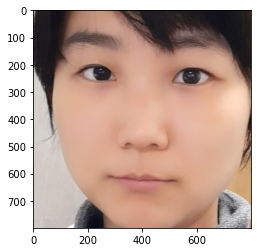

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/me4.jpg'
# image_path = os.getenv('HOME')+'/aiffel/face_embedding/president/obama.jpg'

image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

# 처음에 너무 줌인된 사진을 쓰니 face_locations가 빈 리스트가 되어 최대한 멀리서 찍은 사진으로 다시 하였다. 시작부터 힘들다. 

# 2. 얼굴 영역 자르기
1. get_cropped_face(image_file) 으로 잘라주기
2. Image.fromarray으로 PIL image로 변환한 뒤 저장하여 다양한 재미있는 시각화 시도하기

    힌트
    * from PIL import Image
    * face = get_cropped_face(image_path)
    * pillow_image = Image.fromarray(face)
    * pillow_image.save(path_to_save)


In [2]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face
# plt.imshow(cropped_face) 

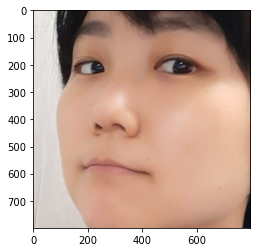

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/me5.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

# 3. 얼굴 영역의 임베딩 추출하기
1. face_recognition으로 얼굴 이미지 불러오고 임베딩 추출하기
2. 다른 사람의 임베딩은 구분할 수 있게 따로 저장하기
3. get_face_embedding(face) & get_face_embedding_dict(dir_path) 로 구하기

In [4]:
import os
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
image_list = os.listdir(image_path)

print("image_list:{}".format(image_list))

image_list:['유리.jpg', '브래들리 쿠퍼.jpg', '러블리즈예인.jpg', '김남주.jpeg', '로다주.jpeg', '피어스 브로스넌.jpg', '고창석.jpeg', '마크 러팔로.jpeg', '김희철.jpg', '박완규.png', '박신양.png', '아이즈원조유리.jpeg', '제이크 질렌할.jpeg', '슬리피.jpg', '길.jpg', '제니.jpg', '레인보우재경.jpg', '이제훈.jpeg', '이희준.jpg', '백윤식.png', '문재인.jpeg', '조이.jpg', '손예진.jpeg', '서강준.jpg', '김종서.jpg', '돈스파이크.jpg', '류승룡.jpeg', '한기범.jpg', '솔라.jpg', '신비.jpg', '세훈.jpg', '김현수.jpeg', 'me1.jpg', '조정치.jpg', '온앤오프라운.jpg', '아이유.jpg', '켄 정.jpeg', 'me7.jpg', '한효주.jpg', '차범근.jpeg', '김상호.png', '최민식.jpg', '목진화.png', '김학범.jpg', '조승우.jpeg', '박재범.jpg', '이용진.jpg', '주진모(올드).jpg', '김연우.jpeg', '트와이스나연.jpg', '온앤오프효진.jpg', '이종석.jpeg', '수지.jpg', '이승철.jpeg', '김고은.jpeg', '황병국.jpg', '제이콥 배털론.jpg', '조정석.jpg', '손흥민.jpg', '제이홉.jpg', '이범수.jpeg', '강민경.jpg', 'biden.jpg', '박희순.jpg', '개리.jpg', '트와이스쯔위.jpg', '케빈 스페이시.jpeg', '안재홍.jpg', '레드벨벳웬디.jpg', '공유.jpg', '사쿠라.jpg', '이정재.jpeg', '황정민.jpg', 'trump.jpg', '디오.jpeg', '앤드류 응.png', '옥냥이.jpeg', '박보영.jpg', '잭 스페이더.jpeg', '이근대위.jpeg', '성룡.jpg', 'b1a4진영.jpeg', '류준열.

In [5]:
# 내가 좋아하는 화사 얼굴 임베딩 벡터를 구해보겠다.
hwasa = os.path.join(image_path, '화사.jpg')
hwasa_face = get_cropped_face(hwasa)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

hwasa_emb = get_face_embedding(hwasa_face)  
hwasa_emb

[array([-0.13114108,  0.09946124,  0.08592116, -0.13508573, -0.15065973,
        -0.02566447, -0.06766795, -0.12515774,  0.13478035, -0.15004484,
         0.14267069, -0.16626638, -0.20777082, -0.01101074, -0.02623628,
         0.21712962, -0.11908096, -0.14459619, -0.04145541,  0.03344917,
         0.04659735,  0.06283363, -0.04215093,  0.06151219, -0.05941767,
        -0.35595509, -0.10486389, -0.02630136, -0.05312204, -0.06306328,
        -0.06761357,  0.05718767, -0.17212608, -0.03743287, -0.00756626,
         0.11253059,  0.00089795, -0.14567442,  0.08702415, -0.01921515,
        -0.31397188,  0.03373487,  0.10482056,  0.21008341,  0.13947208,
        -0.04904453, -0.0134043 , -0.08647421,  0.08791288, -0.18403493,
        -0.02015443,  0.09906568,  0.00989691,  0.05514316,  0.02583596,
        -0.14005882,  0.06388404,  0.09296845, -0.13699807, -0.05480973,
         0.11496912, -0.02696484, -0.03244975, -0.09944336,  0.2246201 ,
         0.1540855 , -0.07590891, -0.25097555,  0.0

In [6]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        try :
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except : 
            continue
            
    return embedding_dict

In [7]:
embedding_dict = get_face_embedding_dict(image_path)
embedding_dict
embedding_dict['화사']

array([-0.13114108,  0.09946124,  0.08592116, -0.13508573, -0.15065973,
       -0.02566447, -0.06766795, -0.12515774,  0.13478035, -0.15004484,
        0.14267069, -0.16626638, -0.20777082, -0.01101074, -0.02623628,
        0.21712962, -0.11908096, -0.14459619, -0.04145541,  0.03344917,
        0.04659735,  0.06283363, -0.04215093,  0.06151219, -0.05941767,
       -0.35595509, -0.10486389, -0.02630136, -0.05312204, -0.06306328,
       -0.06761357,  0.05718767, -0.17212608, -0.03743287, -0.00756626,
        0.11253059,  0.00089795, -0.14567442,  0.08702415, -0.01921515,
       -0.31397188,  0.03373487,  0.10482056,  0.21008341,  0.13947208,
       -0.04904453, -0.0134043 , -0.08647421,  0.08791288, -0.18403493,
       -0.02015443,  0.09906568,  0.00989691,  0.05514316,  0.02583596,
       -0.14005882,  0.06388404,  0.09296845, -0.13699807, -0.05480973,
        0.11496912, -0.02696484, -0.03244975, -0.09944336,  0.2246201 ,
        0.1540855 , -0.07590891, -0.25097555,  0.09100391, -0.12

# 4. 모은 연예인들과 비교하기
1. 모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터간의 거리 비교
2. 가장 작은 연예인이 누구인 지 찾기
3. get_nearest_face(name,top=5) 함수 응용하기

In [8]:
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('me7', '뷔')

0.5462260944135164

In [9]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('me3')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [10]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('me3',
  array([-0.08239774,  0.09806927, -0.00656464, -0.09387926, -0.12513943,
          0.00065051, -0.02276928, -0.09001648,  0.13307817, -0.1141734 ,
          0.20108289, -0.08936648, -0.23737016, -0.03169028, -0.10781159,
          0.17806056, -0.10926494, -0.12500539, -0.11375114,  0.0224223 ,
          0.11402702,  0.08573422, -0.00176276,  0.02749782, -0.1168437 ,
         -0.27638674, -0.06266404, -0.0423554 , -0.01114107, -0.09898545,
         -0.04545664,  0.10322974, -0.16474546, -0.02922782,  0.03143461,
          0.10404436, -0.04121881, -0.07604231,  0.15978889, -0.00101224,
         -0.28160796,  0.06581099,  0.05477594,  0.27077937,  0.17783822,
         -0.08213988,  0.00847976, -0.19600828,  0.11227339, -0.18030354,
         -0.00529337,  0.15240894,  0.07541833,  0.0631246 ,  0.00787179,
         -0.07678683,  0.06723167,  0.1099659 , -0.09846865, -0.01128975,
          0.13592911, -0.05453788, -0.06501925, -0.13126002,  0.14249259,
          0.00346013, -0.1295

In [11]:
def get_nearest_face(name, top=11):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
#     print(sorted_faces)
    print(len(sorted_faces)) # 281개의 이미지를 가져오겠다.
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-6, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            

In [12]:
get_nearest_face('me3')
# 내 사진 7장이 top5 이내로 나와서 이를 제외하고 연예인 사진만 나타내기 위해서 get_nearest_face 함수의 인자를 조정해주었다.

281
순위 -5 : 이름(me2), 거리(0.17786919948167562)
순위 -4 : 이름(me1), 거리(0.19653676074655546)
순위 -3 : 이름(me7), 거리(0.20356605060609156)
순위 -2 : 이름(me6), 거리(0.23395957799287925)
순위 -1 : 이름(me4), 거리(0.2360899235796948)
순위 0 : 이름(me5), 거리(0.3139137307624373)
순위 1 : 이름(비니), 거리(0.37431387252469933)
순위 2 : 이름(케이), 거리(0.3788490595458694)
순위 3 : 이름(태연), 거리(0.401865479841312)
순위 4 : 이름(강미나), 거리(0.40744088653569643)
순위 5 : 이름(공효진), 거리(0.4081993399995834)


나 자신을 제외하고 나를 닮은 연예인들은 목진화,태연,우기,비니로 전부 거리 0.5 이내로 나왔다.  
전혀 신빙성이 없지만 그렇다 하니 믿겠다.

# 5. 다양한 재미있는 시각화 시도하기
* 얼굴 사진을 활용하여 재미있는 시각화 시도하기.
* ~tkinter나 flask를 활용하여 닮은꼴을 찾을 이미지 업로드 후 그 이미지와 닮은 얼굴 찾는 형태로 구현해보기~  
순위별로 선형 그래프 그림. matplotlib

 도표 /그래프 /사진 /순위별 나열/

Text(0.5, 1.0, 'mok')

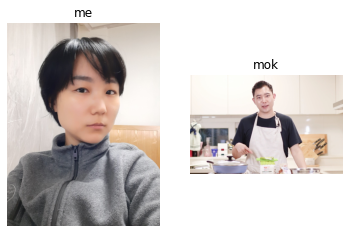

In [13]:
from PIL import Image
import os




me = os.getenv('HOME')+'/aiffel/face_embedding/images/me3.jpg'
mok = os.getenv('HOME')+'/aiffel/face_embedding/images/목진화.png'
kk = os.getenv('HOME')+'/aiffel/face_embedding/images/케이.jpg'
taeyeon = os.getenv('HOME')+'/aiffel/face_embedding/images/태연.jpg'
woogi = os.getenv('HOME')+'/aiffel/face_embedding/images/우기.jpg'
bini = os.getenv('HOME')+'/aiffel/face_embedding/images/비니.jpg'


me_i = Image.open(me)
mok_i = Image.open(mok)
kk_i = Image.open(kk)
taeyeon_i = Image.open(taeyeon)
woogi_i = Image.open(woogi)
bini_i = Image.open(bini)


plt.subplot(121)
plt.imshow(me_i)
plt.axis('off')
plt.title('me')

plt.subplot(122)
plt.imshow(mok_i)
plt.axis('off')
plt.title('mok')



Text(0.5, 1.0, 'bini')

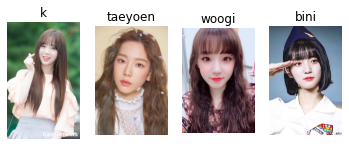

In [14]:
plt.subplot()
plt.subplot(141)
plt.imshow(kk_i)
plt.axis('off')
plt.title('k')

plt.subplot(142)
plt.imshow(taeyeon_i)
plt.axis('off')
plt.title('taeyoen')

plt.subplot(143)
plt.imshow(woogi_i)
plt.axis('off')
plt.title('woogi')

plt.subplot(144)
plt.imshow(bini_i)
plt.axis('off')
plt.title('bini')


#  회고
내용 이해가 좀 어려웠는데 내 사진을 직접 적용해서 해보니 재밌는 것 같다. 다만 코드를 더 간결하게 만들어서 이쁘게 만들 수도 있었을 텐데 그걸 못해서 아쉬웠다. 이상!

다음부턴 더 잘해봐야겠다!!